Dataset Shape: (301, 9)
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float

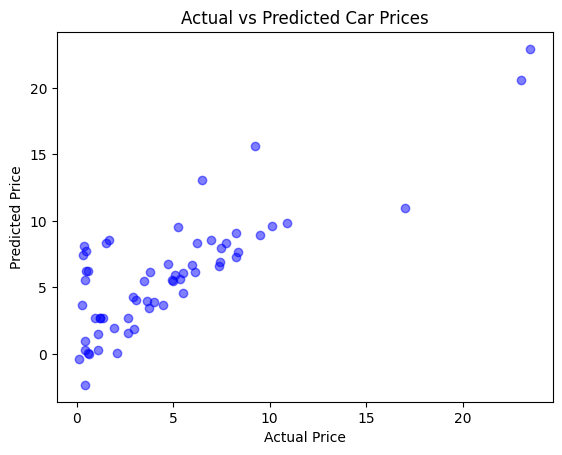

In [2]:
# Car Price Prediction with Machine Learning

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
# If dataset is uploaded in Colab, use:
# from google.colab import files
# uploaded = files.upload()

# Example: reading CSV file
df = pd.read_csv("/content/car data.csv")  # replace with your file name

# 3. Explore Data
print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# 4. Handle Missing Data (if any)
df = df.dropna()

# 5. Select Features & Target
# Example: Assume dataset has 'price' as target column
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Convert categorical variables into dummy/one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)

# 9. Evaluate Model
print("\nModel Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

# 10. Visualization
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()